In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")


In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape


(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation = gold_data.corr()

<AxesSubplot:>

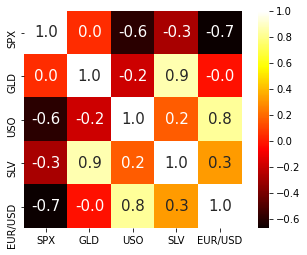

In [9]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':15}, cmap='hot')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

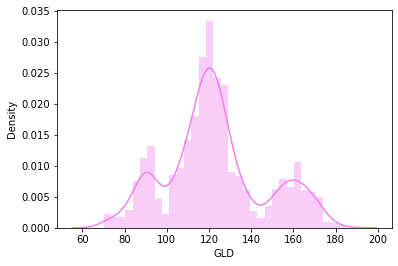

In [11]:
sns.distplot(gold_data['GLD'],color='violet')

In [12]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [16]:

regressor = RandomForestRegressor(n_estimators=100)

In [17]:

regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
pickle.dump(regressor,open('model.pkl', 'wb'))

In [19]:
model = pickle.load(open('model.pkl', 'rb'))

In [20]:
print(model.predict([[1/3/2008,1447.160034,85.57,78.370003]]))

[151.09829857]


In [21]:

test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)


[168.20739931  82.26609974 116.08130029 127.73530111 120.71480107
 154.81819745 149.92539893 126.32130066 117.30409875 126.07940036
 116.40720127 172.21580109 141.07129898 167.90289807 115.17399995
 117.55320045 138.19910233 169.9884008  159.48050328 160.06239871
 155.09410007 125.39700039 176.3205001  156.99010319 125.22980062
  93.6783996   77.03170011 120.57160008 119.02829925 167.46239978
  88.09690055 125.41500021  91.13260053 117.62040005 121.18939891
 136.58140112 115.58900059 115.36880056 146.72469929 107.0355012
 104.52130245  87.19269795 126.44440105 117.76729987 154.72999945
 119.78580004 108.33260028 108.19809868  93.1584008  127.13009794
  74.80850006 113.7330995  121.23609995 111.27499904 119.02549906
 120.70639944 158.47739969 166.65430158 146.69369655  85.85739885
  94.57500028  86.79409875  90.40600039 119.03670063 126.4477009
 127.43120002 169.94209973 122.39719919 117.4713994   98.63460035
 167.8015012  143.19869844 132.31440241 121.17920233 121.60189929
 119.6125006

In [23]:
# error score calculation on the actual data i.e Y_test and predicted data - test_data_prediction
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score*100,"%") 

R squared error:  98.95029671373598 %


In [24]:
#real good error as compared to the values 
#Comparison of actual and predicted values
Y_test = list(Y_test)

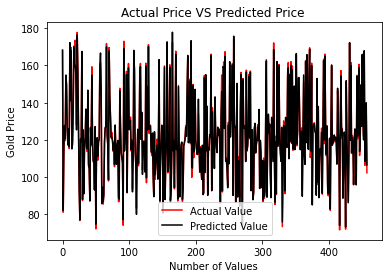

In [25]:

plt.plot(Y_test, color = 'red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label= 'Predicted Value')
plt.title('Actual Price VS Predicted Price ')
plt.xlabel('Number of Values ')
plt.ylabel('Gold Price')
plt.legend()
plt.show()